# Effective Targetting of Advertisments

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('advertising_ef.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      998 non-null    object 
 6   Gender                    1009 non-null   object 
 7   Country                   996 non-null    object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


# Data Preprocessing

Dealing with Null Values

In [4]:
data.isna().sum()
#counting null values in the dataset

Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64

There are null values present inside some of the columns of the dataset

In [5]:
data.rename(columns={'Daily Time Spent on Site':'Daily_Time_Spent_on_Site'}, inplace=True)

In [6]:
print(data['Daily_Time_Spent_on_Site'].mean())
print(data['Daily_Time_Spent_on_Site'].median())

65.00946268656728
68.37


In [7]:
data['Daily_Time_Spent_on_Site'].fillna(data['Daily_Time_Spent_on_Site'].median(),inplace=True)
#Filling the null values of Daily time spent on site with its median.

Imputed ands replaced the null values of Daily Time Spent On Site with its Median

In [10]:
print(data['Age'].mean())
print(data['Age'].median())

#Calculating the mean and median values for the age column so as to replace them with null values

35.96292585170341
35.0


Here we have checked for the mean and median value of Age column to find with which we can replace our null values

In [11]:
data['Age'].fillna(data['Age'].median(),inplace=True)

#Replacing the Age column's NUll values with the median

Since Age cannot be in decimals so we consider the median of Age column to replace null values

Similiarly we check For 'Area Income' column

In [12]:
print(data['Area Income'].mean())
print(data['Area Income'].median())

#Similarly, we find mean and median values to replace null values of the Area Income column

54958.573617234484
56998.245


In [13]:
data['Area Income'].fillna(data['Area Income'].mean(),inplace=True)

Filled the null values with the mean of Area Income and then rounding the numbers upto two decimals

In [217]:
data['Area Income'] = np.around(data['Area Income'],decimals=2)

In [218]:
data['Daily Internet Usage'].fillna(data['Daily Internet Usage'].mean(),inplace=True)

In [15]:
data['City'].value_counts()

#value counts returns a series containing counts of unique values

Williamsport         3
Lisamouth            3
Wrightburgh          2
Millerbury           2
North Charlesbury    2
                    ..
Karenton             1
Port Kathleenfort    1
Lake Adrian          1
Mollyport            1
South Jessica        1
Name: City, Length: 961, dtype: int64

In [16]:
data['City'].value_counts().index[0]

'Williamsport'

In [17]:
data['City'].fillna(data['City'].value_counts().index[0],inplace=True)

#filling the null values of City with Williamsport as a default value

In [18]:
data['Country'].value_counts().index[0]
data['Country'].fillna(data['Country'].value_counts().index[0],inplace=True)

In [19]:
data.isna().sum()

Daily_Time_Spent_on_Site    0
Age                         0
Area Income                 0
Daily Internet Usage        4
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

All the Null values have been imputed

Finding the Correlation Betweeen The Columns

In [21]:
data.corr()

#Finding correlation between the columns using the inbuilt funtion of panda library.

,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
Daily_Time_Spent_on_Site,1.000000,-0.327560,0.310296,0.515044,-0.742900
Age,-0.327560,1.000000,-0.178185,-0.367315,0.487808
Area Income,0.310296,-0.178185,1.000000,0.333215,-0.472515
Daily Internet Usage,0.515044,-0.367315,0.333215,1.000000,-0.787059
Clicked on Ad,-0.742900,0.487808,-0.472515,-0.787059,1.000000


In [25]:
import seaborn as sns

<AxesSubplot:>

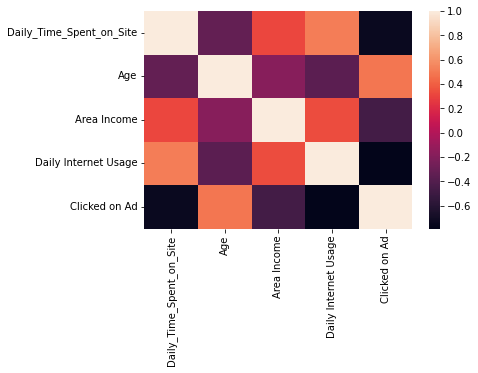

In [28]:
sns.heatmap(data.corr())

#heatmap for showing correlation

<AxesSubplot:xlabel='Age', ylabel='Count'>

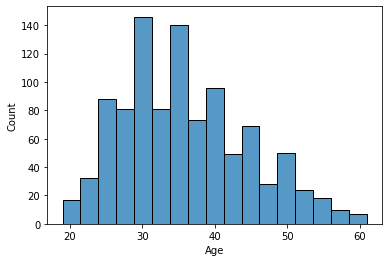

In [29]:
sns.histplot(data['Age'])

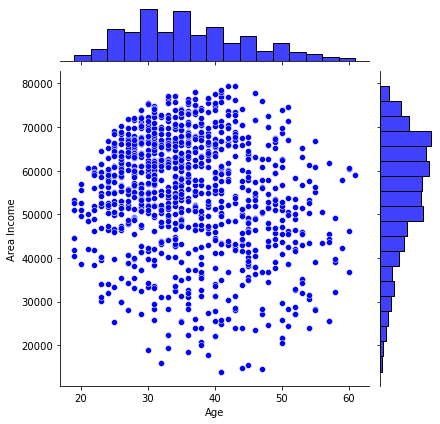

In [30]:
sns.jointplot(x='Age', y='Area Income', data=data, color="blue")

Analysing Joint Plot Between Area Income column and Age Column

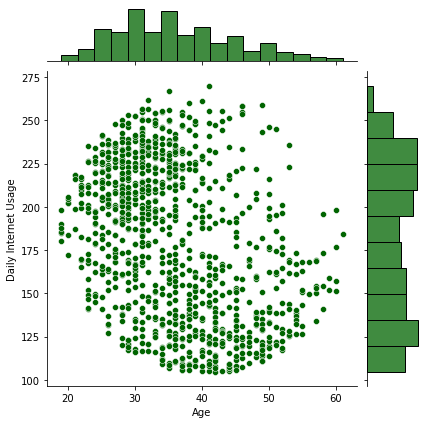

In [31]:
sns.jointplot(x='Age', y='Daily Internet Usage', data=data, color='darkgreen')

Analysing Joint Plot Between Daily Internet Usage Column and Age Column

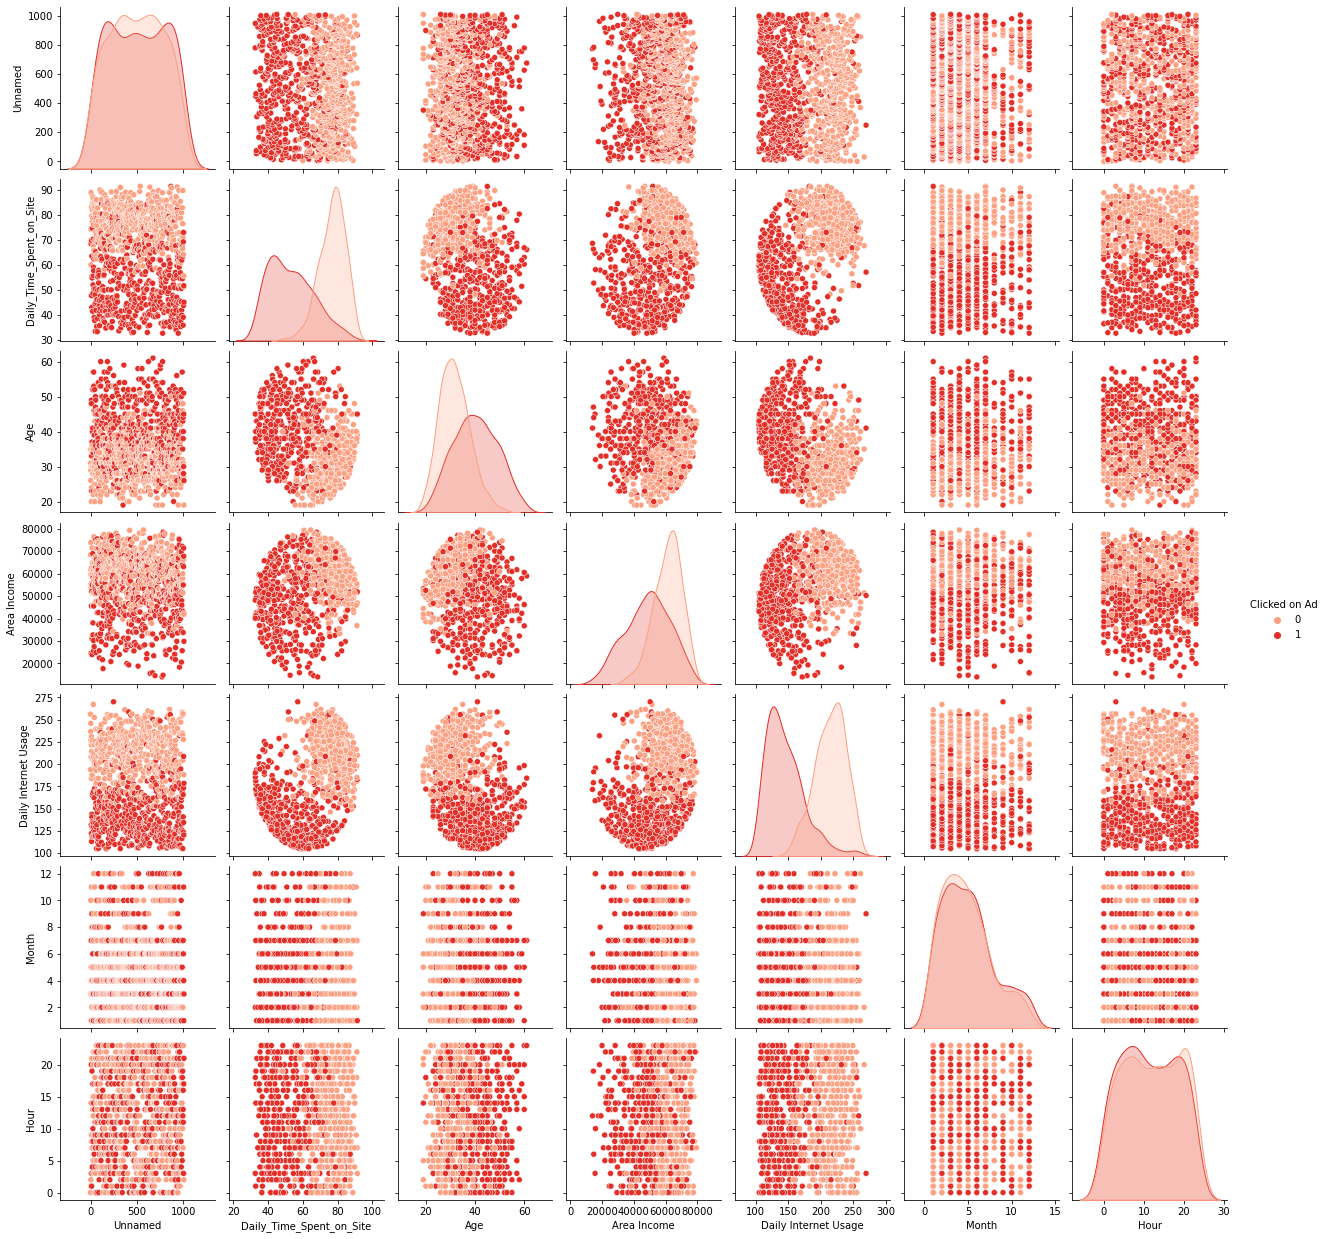

In [45]:
sns.pairplot(data, hue='Clicked on Ad', palette="Reds")

#Checking the relation between each and every data present in the csv file with the parameter clicked on ad

Analysing the relation between each and every variable present in the dataset with target function Clicked On Ad

Checking Whether There is Class imbalance in the Dataset

In [33]:
data['Clicked on Ad'].value_counts()

1    506
0    503
Name: Clicked on Ad, dtype: int64

In [34]:
data.to_csv('Cleaned_Advertisements.csv')

The occurence of '1' is 506 and of '0' is 503. So there is not much difference and there both are equally probable in the dataset 

Here we take our Cleaned Dataset On which we have applied Preprocessing

# Data Modelling

In [35]:
data = pd.read_csv('Cleaned_Advertisements.csv')

In [36]:
data.head()

,Unnamed: 0,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1009 non-null   int64  
 1   Daily_Time_Spent_on_Site  1009 non-null   float64
 2   Age                       1009 non-null   float64
 3   Area Income               1009 non-null   float64
 4   Daily Internet Usage      1005 non-null   float64
 5   Ad Topic Line             1009 non-null   object 
 6   City                      1009 non-null   object 
 7   Gender                    1009 non-null   object 
 8   Country                   1009 non-null   object 
 9   Timestamp                 1009 non-null   object 
 10  Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 86.8+ KB


Checking the number of unique values present in column AD Topic Line, City And Country

In [38]:
object_Dtype = ['Ad Topic Line', 'City', 'Country']
data[object_Dtype].describe(include=['O'])

,Ad Topic Line,City,Country
count,1009,1009,1009
unique,1000,961,237
top,Proactive non-volatile encryption,Williamsport,Czech Republic
freq,2,14,22


Here we can see these columns have many unique values in them which will make it difficult to find a pattern from these columns to make a suitable model for predictions.

So we reject the columns Ad Topic Line, City, Country 

Now checking for Time Stamp Column which is object Data type.
We Split the column into two different Columns Month and Hour. So that Our model can effectively Target the best timezone trends.

In [39]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Month'] = data['Timestamp'].dt.month
data['Hour'] = data['Timestamp'].dt.hour
data = data.drop(['Timestamp'], axis=1)

In [40]:
data.head()

,Unnamed: 0,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month,Hour
0,0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,0,3,0
1,1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,0,4,1
2,2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,0,3,20
3,3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,0,10,2
4,4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,0,3,3


In [46]:
data.rename(columns={'Unnamed: 0':'Unnamed'}, inplace=True)

Dropped The Unnamed:0 column from the dataset

In [47]:
data.drop('Unnamed',axis=1,inplace=True)

Label Encoding Gender Column using Label Encoder

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])

In [50]:
data.head()

,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month,Hour
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,3,0
1,68.37,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,4,1
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,3,20
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,10,2
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,3,3


In [51]:
data.corr()

,Daily_Time_Spent_on_Site,Age,Area Income,Daily Internet Usage,Gender,Clicked on Ad,Month,Hour
Daily_Time_Spent_on_Site,1.000000,-0.327560,0.310296,0.515044,-0.021174,-0.742900,-0.021973,0.005661
Age,-0.327560,1.000000,-0.178185,-0.367315,-0.016146,0.487808,0.021373,-0.054559
Area Income,0.310296,-0.178185,1.000000,0.333215,0.008326,-0.472515,-0.034775,0.030579
Daily Internet Usage,0.515044,-0.367315,0.333215,1.000000,0.027620,-0.787059,-0.002903,0.073451
Gender,-0.021174,-0.016146,0.008326,0.027620,1.000000,-0.038563,-0.029448,0.053415
Clicked on Ad,-0.742900,0.487808,-0.472515,-0.787059,-0.038563,1.000000,0.039507,-0.049069
Month,-0.021973,0.021373,-0.034775,-0.002903,-0.029448,0.039507,1.000000,-0.005081
Hour,0.005661,-0.054559,0.030579,0.073451,0.053415,-0.049069,-0.005081,1.000000


<AxesSubplot:>

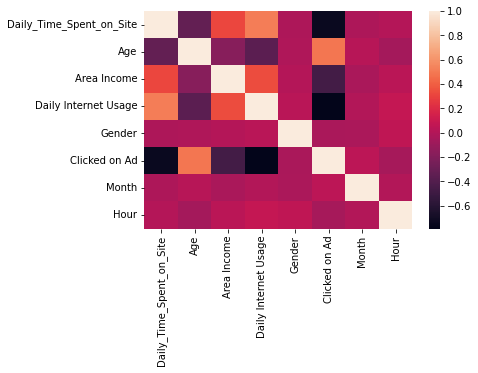

In [54]:
sns.heatmap(data.corr())

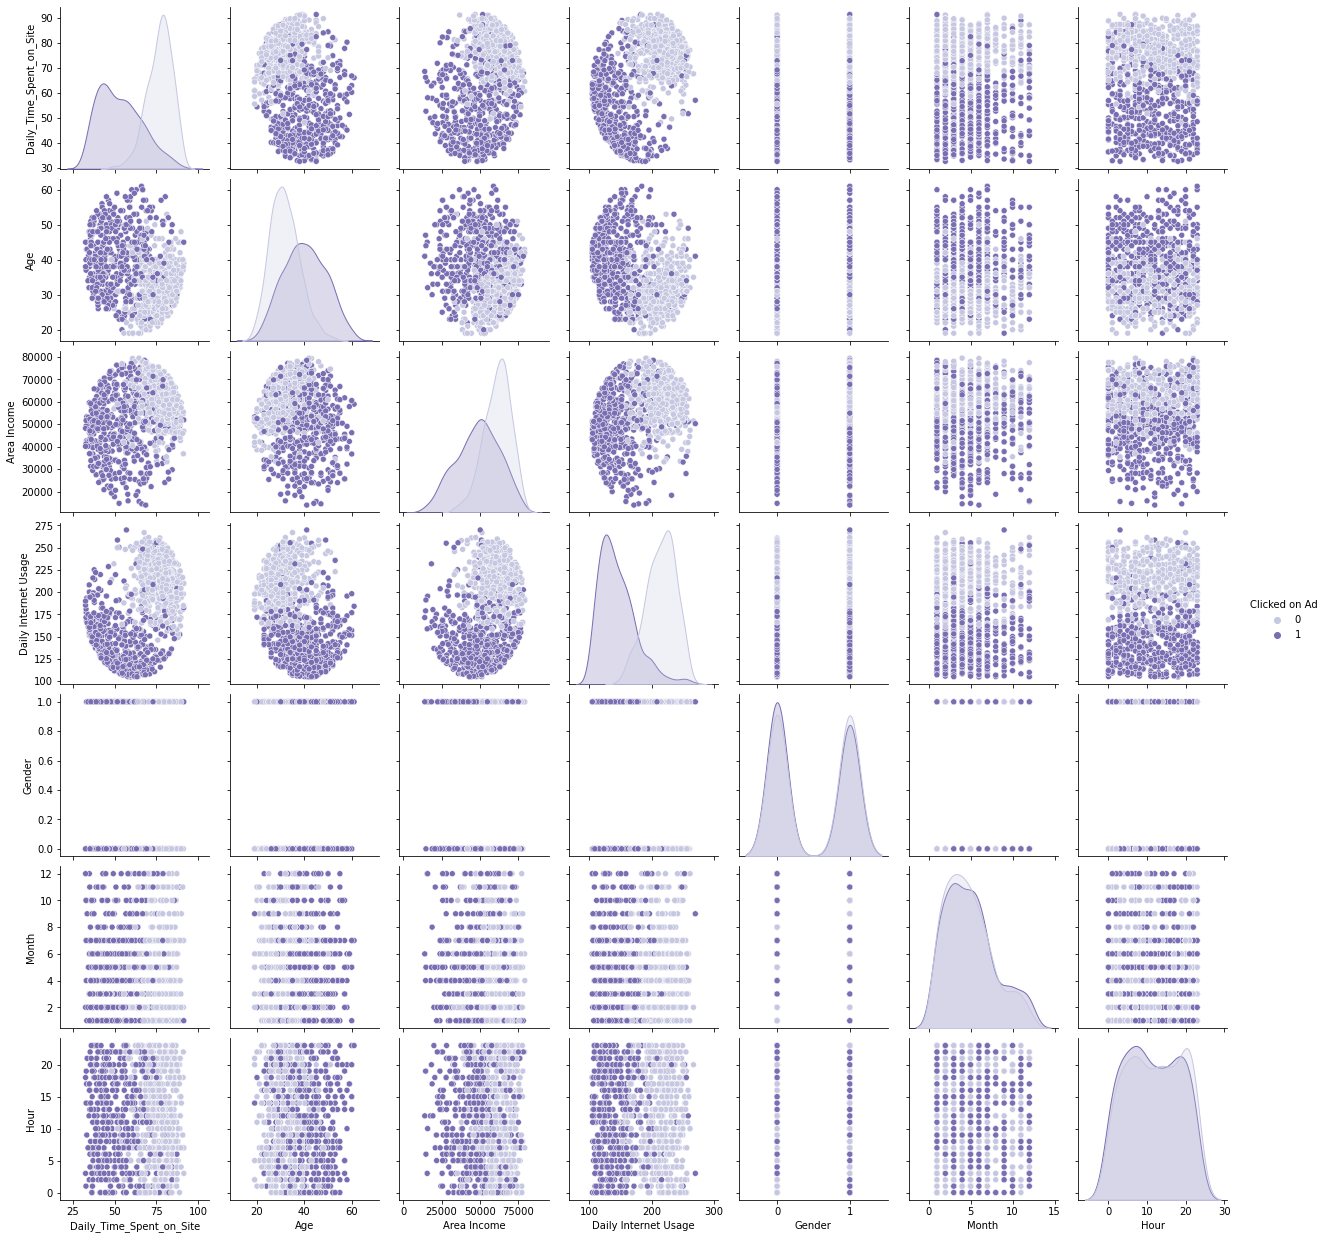

In [55]:
sns.pairplot(data, hue='Clicked on Ad', palette="Purples")

Our Dataset is a classification Dataset i.e. it predicts values ither '0' or '1' which is not clicked or clicked resp.

So the models which we can apply on our dataset could be :

Desicion Tree Classifier

Logistic Regression

Simple Vector Method (SVM)


From the above methods we choose Decision Tree Classifier & Logistic Regression for our dataset 

# Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
from sklearn.model_selection import train_test_split
y = data['Clicked on Ad']
X = data.iloc[:,[0,1,2,3,6,9,10]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [68]:
X,y

(      Daily_Time_Spent_on_Site   Age  Area Income  Daily Internet Usage  \
 0                        68.95  35.0     61833.90                256.09   
 1                        68.37  31.0     68441.85                193.77   
 2                        69.47  26.0     59785.94                236.50   
 3                        74.15  29.0     54806.18                245.89   
 4                        68.37  35.0     73889.99                225.58   
 ...                        ...   ...          ...                   ...   
 1004                     72.97  30.0     71384.57                208.58   
 1005                     51.30  45.0     67782.17                134.42   
 1006                     51.63  51.0     42415.72                120.37   
 1007                     55.55  19.0     41920.79                187.95   
 1008                     45.01  26.0     29875.80                178.35   
 
       Gender  Month  Hour  
 0          0      3     0  
 1          1      4     1  

In [69]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [70]:
ypred_train = dt.predict(X_train)
ypred_test = dt.predict(X_test)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [61]:
ypred_train

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,

In [64]:
ypred_test

NameError: name 'ypred_test' is not defined

In [253]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score,classification_report
print(f"Accuracy score is on Train data {accuracy_score(y_train,ypred_train)}")
print(f"\nAccuracy score is on Test data {accuracy_score(y_test,ypred_test)}")
print(f"\nF1 score is on Test data {f1_score(y_test,ypred_test)}")
cm = confusion_matrix(y_test,ypred_test)
print('\nConfusion Matrix : ')
print(cm)

Accuracy score is on Train data 0.9886685552407932

Accuracy score is on Test data 0.9504950495049505

F1 score is on Test data 0.9488054607508534

Confusion Matrix : 
[[149   7]
 [  8 139]]


In [254]:
from sklearn.model_selection import cross_val_score 
accuracies_dt = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 10) 
print("For Decision Tree : ")
print(f"Mean of Accuracy Score Using cross validation is {accuracies_dt.mean()}")
print(f"Standard Deviation of Accuracy Score Using cross validation is {accuracies_dt.std()}")

For Decision Tree : 
Mean of Accuracy Score Using cross validation is 0.9490342052313883
Standard Deviation of Accuracy Score Using cross validation is 0.015763929446882784


# Logistic Regression

In [255]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [256]:
predictions = logmodel.predict(X_test)

In [257]:
accuracy_score(y_test, predictions)

0.9042904290429042

In [258]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       156
           1       0.92      0.88      0.90       147

    accuracy                           0.90       303
   macro avg       0.91      0.90      0.90       303
weighted avg       0.91      0.90      0.90       303

[[145  11]
 [ 18 129]]


We notice that our model gives 90.42% accuracy on normal LoR

So, we apply hyperparameter tuning **'newton-cg'** on our LoR model to increase the efficiency of our model 

In [259]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='newton-cg')
logmodel.fit(X_train, y_train)

c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:456: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
c:\Users\himan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(solver='newton-cg')

In [260]:
predictions = logmodel.predict(X_test)

In [261]:
accuracy_score(y_test, predictions)

0.9603960396039604

In [262]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       156
           1       0.97      0.95      0.96       147

    accuracy                           0.96       303
   macro avg       0.96      0.96      0.96       303
weighted avg       0.96      0.96      0.96       303

[[151   5]
 [  7 140]]


So we conclude that after applying hyperparameter tuning on our LoR model we got the accuracy as 96.03%

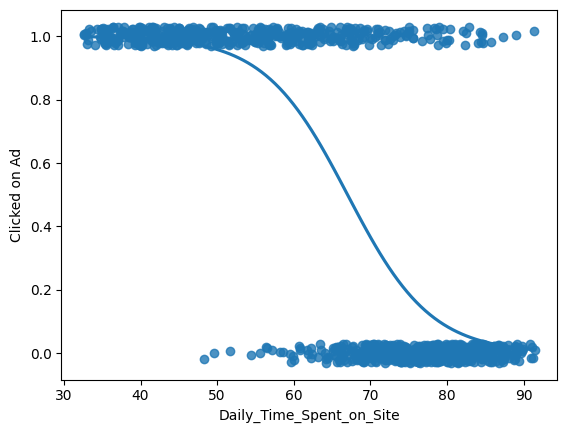

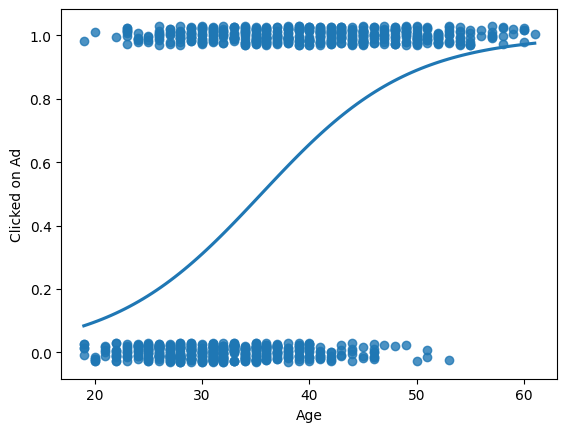

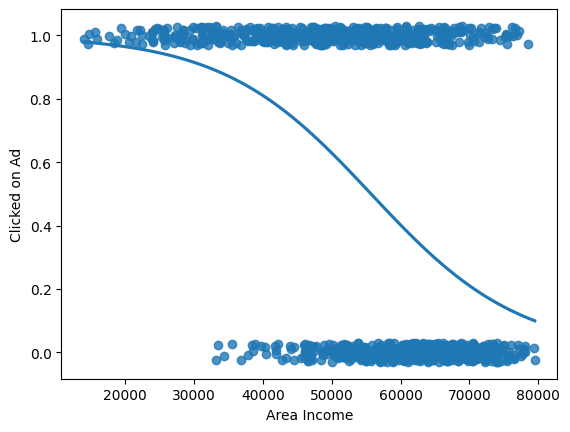

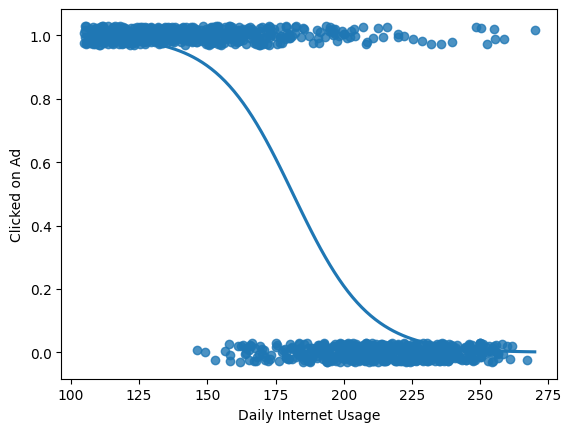

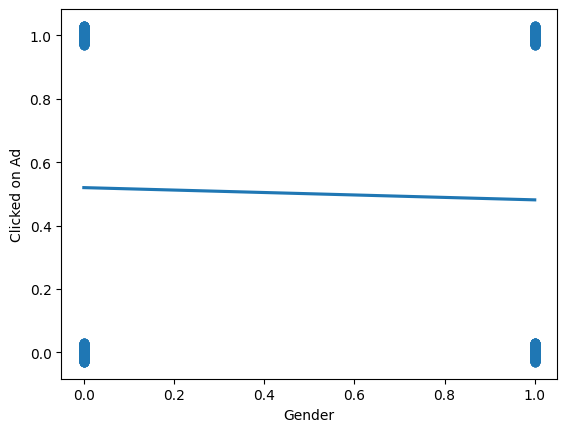

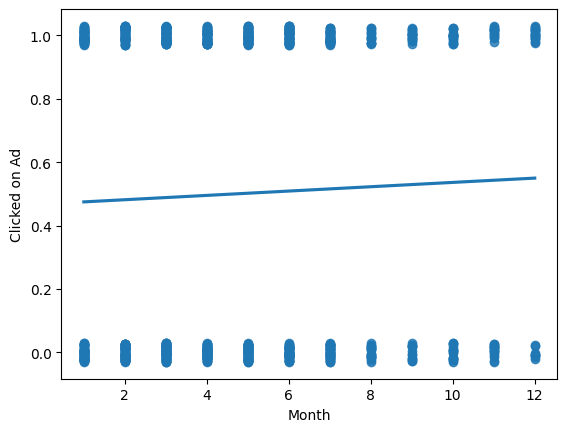

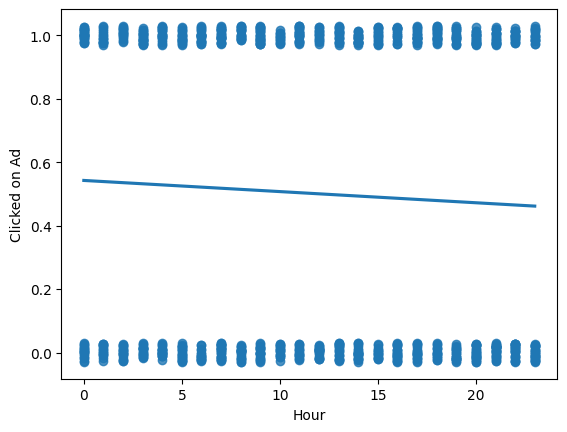

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt
list = [0,1,2,3,6,9,10]
for i in list:
    sns.regplot(x=data.iloc[:,i],y="Clicked on Ad",y_jitter=0.03,data=data,logistic=True,ci=None)
    plt.show()


**So After Training the dataset through different kind of Model we get :**

**From the Decision Tree Classifier Model we get :**
Mean of Accuracy score as 0.93


**From the Logistic Regression Model we get :**
Mean of Accuracy score as 0.90


**From the Logistic Regression Model (Hyperparameter tuning applied) we get :**
Mean of Accuracy score as 0.96

